# A Feed Forward Network to Predict Heart Disease

In [1]:
# Load libraries / packages / functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Change the graphics settings to display vector graphics for prettier outputs
from IPython import display
display.set_matplotlib_formats("svg")

# Self-defined functions in python scripts in this project
# (some imports are likely to be redundant)
from read_data import read_data
from FFNHeartDisease import FFNHeartDisease
from initiate_model import initiate_model
from train_model import train_model

/var/folders/wk/cgsrf1m50qx268ccx7b33rdr0000gn/T/ipykernel_27174/4185160223.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [2]:
# Read the data and get a small glimpse at the data (pd.DataFrame)
data = read_data()[0]
print(data.shape)
print(data.dtypes)

(303, 14)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object


In [3]:
# Remove rows with missing values (?)

data = data.replace("?", np.nan)
data = data.dropna(axis = 0)
print(data.shape)
data = data.astype(float)
print(data.dtypes)


(297, 14)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object


In [4]:
# Divide data into the predictors and outcomes
y = np.zeros(len(data))
y[data[13] > 0] = 1
X = data.iloc[:, :13]

In [5]:
# Train-test-split the data + create a holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test,
                                                        test_size = 0.5,
                                                        random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_holdout.shape, y_holdout.shape)

(237, 13) (237,)
(30, 13) (30,)
(30, 13) (30,)


In [6]:
# Standardize the predictors 
scaler      = StandardScaler()

X_train     = scaler.fit_transform(X_train)
X_test      = scaler.transform(X_test)
X_holdout   = scaler.transform(X_holdout)

In [7]:
# Turn the data into torch.Tensors, TensorDatasets, and finally DataLoaders
## Training data
train_data      = torch.Tensor(X_train).float()
train_labels    = torch.Tensor(np.array(y_train)[:, None]).float() 
train_set       = TensorDataset(train_data, train_labels)

# Test data
test_data       = torch.Tensor(X_test).float()
test_labels     = torch.Tensor(np.array(y_test)[:, None]).float()
test_set        = TensorDataset(test_data, test_labels)

# Holdout data
holdout_data    = torch.Tensor(X_holdout).float()
holdout_labels  = torch.Tensor(np.array(y_holdout)[:, None]).float()
holdout_set     = TensorDataset(holdout_data, holdout_labels)

In [58]:
BATCHSIZE = 16
DEPTH = 2
WIDTH = 256
DROPOUT = 0.6
BATCHNORMALIZE = True
LEARNINGRATE = 0.001
EPOCHS = 300

In [59]:
# Create DataLoaders
train_loader = DataLoader(train_set,
                          batch_size = BATCHSIZE,
                          drop_last = True,
                          shuffle = True)
test_loader = DataLoader(test_set,
                         batch_size = test_set.tensors[0].shape[0],
                         drop_last = True,
                         shuffle = True)
holdout_loader = DataLoader(holdout_set,
                            batch_size = holdout_set.tensors[0].shape[0],
                            drop_last = True,
                            shuffle = True)

In [60]:
# Test the model and loss function
model_instance, loss_function, optimizer = initiate_model(depth=DEPTH,
                                                          width=WIDTH,
                                                          dropout=DROPOUT,
                                                          batch_normalize=BATCHNORMALIZE)
X, y = next(iter(train_loader))
y_hat = model_instance(X)

#loss_function(y_hat, y)
#torch.sigmoid(y_hat, )

In [61]:
train_accuracy, test_accuracy, losses, model_instance = train_model(
    train_loader=train_loader,
    test_loader=test_loader,
    epochs=EPOCHS,
    depth=DEPTH,
    width=WIDTH,
    dropout=DROPOUT,
    batch_normalize=BATCHNORMALIZE,
    learning_rate=LEARNINGRATE)


Going to train 300 epochs.
Training epoch 0
Training epoch 10,
             last trainloss was 0.33174604177474976,
             last trainaccuracy was 83.03571319580078,
             last testaccuracy was 83.33332824707031
Training epoch 20,
             last trainloss was 0.22723524272441864,
             last trainaccuracy was 87.94642639160156,
             last testaccuracy was 86.66666412353516
Training epoch 30,
             last trainloss was 0.19543270766735077,
             last trainaccuracy was 91.51786041259766,
             last testaccuracy was 90.0
Training epoch 40,
             last trainloss was 0.20565418899059296,
             last trainaccuracy was 91.07142639160156,
             last testaccuracy was 86.66666412353516
Training epoch 50,
             last trainloss was 0.16260403394699097,
             last trainaccuracy was 91.96428680419922,
             last testaccuracy was 86.66666412353516
Training epoch 60,
             last trainloss was 0.1611189097166061

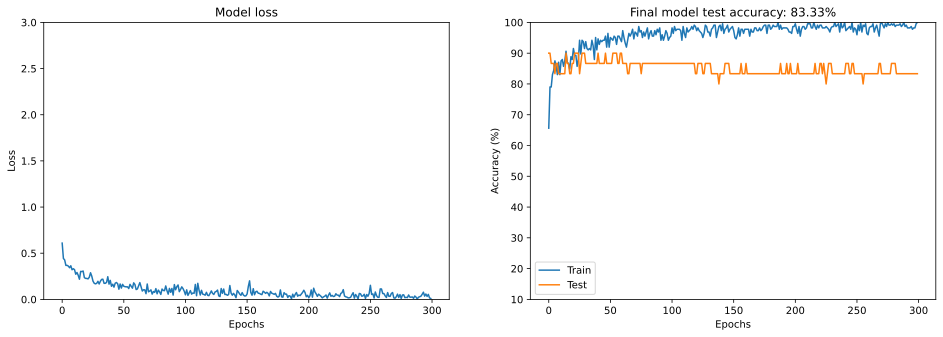

In [62]:
# Display results
fig,ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].plot(losses)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_ylim([0, 3])
ax[0].set_title("Model loss")

ax[1].plot(train_accuracy,label = "Train")
ax[1].plot(test_accuracy,label = "Test")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_ylim([10, 100])
ax[1].set_title(f"Final model test accuracy: {test_accuracy[-1]:.2f}%")

ax[1].legend();
